In [1]:
import os
from PIL import Image,ImageFilter
import cv2
from rembg import remove
from matplotlib import pyplot as plt
import numpy as np


Open Scene 1 Original Image, Thumbnail (resize) it and save

(1350, 900)


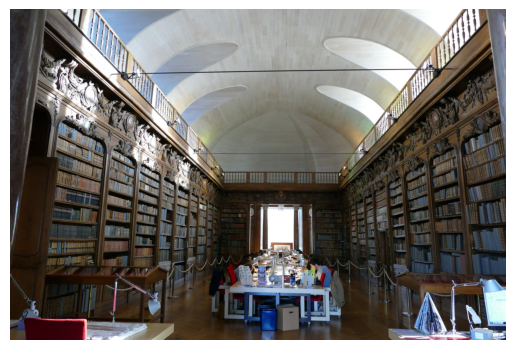

In [3]:
scene1_main_image_dir = "D:\\Download_In_D\\3D_Python\\Scene1\\Source\\alencon-ancienne-chapelle-des-jesuites-actuelle-bibliotheque-1.jpg"
maxsize = (1600,900) #Set the maximum Image size to window size


img_scene1 = Image.open(scene1_main_image_dir)
img_scene1.thumbnail(maxsize)
img_scene1.save("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Scene1_Thumbnailed.jpg")
print(img_scene1.size)
plt.axis('off')
plt.imshow(img_scene1)
plt.show()

Add Dizzy Effec to show Just wake Up
- Creating Image for making gif/video

In [4]:

k_size = [1,3,5,7,9,0,7,0,9,7,5,3,1,1,1] #Number and level of Blury image to create
scene1_main_image_dir = "D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Scene1_Thumbnailed.jpg"
img_scene1 = Image.open(scene1_main_image_dir)

ctr = 0
for i in k_size:
    image_dest_path = "D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Blurs\\S1_1\\Scene1_"+str(ctr)+".jpg" # Where you want to save the result
    ctr +=1
    
    if i==0:
        black_scene = np.zeros((900,1350,3), dtype=np.uint8) #same size, black screen
        cv2.imwrite(image_dest_path,black_scene)
    else:
        img_scene1 = Image.open(scene1_main_image_dir) #Refresh
        img_scene1 = img_scene1.filter(ImageFilter.MedianFilter(i)) #Apply
        img_scene1.save(image_dest_path)
    

GIF and VIDEO

In [18]:
folder = "D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Blurs\\S1_1"
images = []

def create_video_from_images(folder):
    """Generate a video from all images in the specified folder."""
    video_filename = folder + '\\Blur_WokeUp.mp4'
    valid_images = [i for i in os.listdir(folder) if i.endswith((".jpg"))]

    first_image = cv2.imread(os.path.join(folder, valid_images[0]))
    h, w, _ = first_image.shape

    codec = cv2.VideoWriter_fourcc(*'mp4v')
    vid_writer = cv2.VideoWriter(video_filename, codec, 120, (w, h))

    for img in valid_images:
        loaded_img = cv2.imread(os.path.join(folder, img))
        for _ in range(20):
            vid_writer.write(loaded_img)
        
        images.append(Image.open(os.path.join(folder, img)))
    images[0].save(folder+'\\Blur_WokeUp.gif',save_all = True, append_images = images[1:], optimize = False, duration = 300,loop = 0)    
    
    vid_writer.release()

create_video_from_images(folder) #Created Video

#GIF shown below

![SegmentLocal](\Outcome\Blurs\S1_1\Blur_WokeUp.gif "segment")


He woke up in a library, he accidentally fell asleep when studying for final exam. He feel like he need to go church to pray for better result in final exam. So, he take out his phone to check which church to go.

- _Import phone original image_
    - *remove background*
    - *Add phone into Scene1 image*
- _Create Church Figure_
- *Add phone,church,google map onto phone screen*
- Remove Glasses background and make it Png

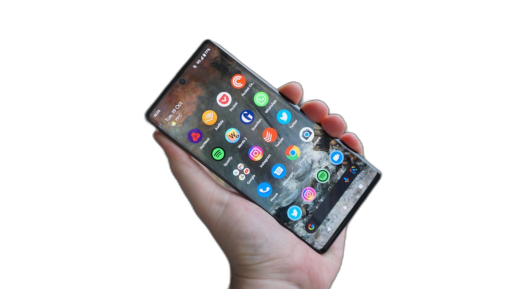

(1200, 675)


In [19]:
#Import Background image needed in scene 1
scene1_sub_image_dir = "D:\\Download_In_D\\3D_Python\\Scene1\\Source\\Phone2.jpg"
phone = Image.open(scene1_sub_image_dir)
phone = phone.convert('RGB')

phone_RemovedBG = remove(phone)
phone_RemovedBG.save("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\phoneRemovedBG.png")
phone_RemovedBG.show()
plt.axis('off')
plt.imshow(phone_RemovedBG)
plt.show()
print(phone_RemovedBG.size)

- _Create (Combine) Church Figure using matplotlib_

Figure(640x480)


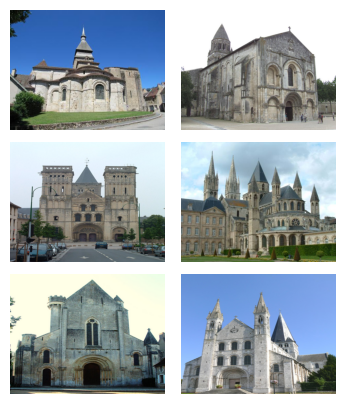

<Figure size 640x480 with 0 Axes>

In [20]:

folder = "D:\\Download_In_D\\3D_Python\\Scene1\\Source\\Church"
wanted_size = (450,350)

c = 1
#img1,img2,img3,img4,img5,img6 = "a"
for img_file in os.listdir(folder):
    if img_file.endswith((".jpg", ".jpeg",".png")):        
        image_path = os.path.join(folder, img_file)
                
        # Processing the image
        input = Image.open(image_path)
        
        name='D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Churchs.png'
        
        if c == 1:
            img1 = Image.open(image_path)
            # print("size of Img1 : " + str(img1.size))
            img1 = img1.resize(wanted_size)
            
        elif c == 2:
            img2 = Image.open(image_path)
            # print("size of Img2 : " + str(img2.size))
            img2 = img2.resize(wanted_size)
            
        elif c == 3:
            img3 = Image.open(image_path)
            # print("size of Img3 : " + str(img3.size))
            img3 = img3.resize(wanted_size)
            
        elif c == 4:
            img4 = Image.open(image_path)
            # print("size of Img4 : " + str(img4.size))
            img4 = img4.resize(wanted_size)
            
        elif c == 5:
            img5 = Image.open(image_path)
            # print("size of Img5 : " + str(img5.size))
            img5 = img5.resize(wanted_size)
            
        elif c == 6:
            img6 = Image.open(image_path)
            # print("size of Img6 : " + str(img6.size))
            img6 = img6.resize(wanted_size)
        
        c+=1


plt.subplot(3, 2, 1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(img2)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(img3)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(img4)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(img5)
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(img6)
plt.axis('off')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=-0.5, 
                    hspace=0.1)
plt.savefig("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Church\\Churchs_Collections.png",bbox_inches='tight')
print(plt.figure())
plt.show()

- _paste Figure onto phone screen, to pretent He is scrolling through churchs_

- _Add phone into scene1_

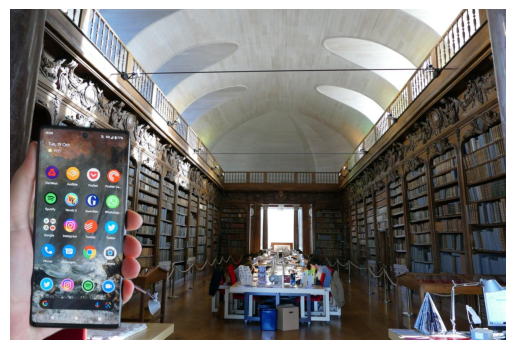

In [21]:
from PIL import Image

scene1_main_image_dir = "D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Scene1_Thumbnailed.jpg"
img_scene1 = Image.open(scene1_main_image_dir)

# creating a image object (main image)
phone_RemovedBG = Image.open("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\phoneRemovedBG.png")
phone_RemovedBG = phone_RemovedBG.rotate(angle = -55)

Image.Image.paste(img_scene1,phone_RemovedBG, (-425,250),mask=phone_RemovedBG)

img_scene1.show()
img_scene1.save("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Scene1_Thumbnailed_Phone.jpg")
plt.axis('off')
plt.imshow(img_scene1)
plt.show()

_Add Map and Figure_

(242, 310),(1350, 900)


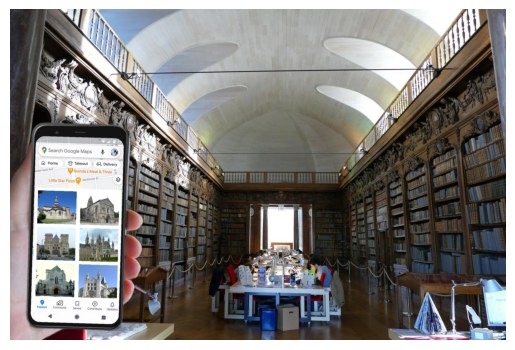

In [22]:
from PIL import Image

scene1_main_image_dir = "D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Scene1_Thumbnailed_Phone.jpg"
img_scene1 = Image.open(scene1_main_image_dir)



GoogleMap = Image.open("D:\\Download_In_D\\3D_Python\\Scene1\\Source\\Map.jpg")
GoogleMap_RemovedBG = remove(GoogleMap)
GoogleMap_RemovedBG.save("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\MapRemovedBG.png")
GoogleMap = Image.open("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\MapRemovedBG.png")
GoogleMap = GoogleMap.rotate(-1.7,expand=4)

new_size = ((int(GoogleMap.width*0.51),int(GoogleMap.height*0.51)))
GoogleMap=GoogleMap.resize(new_size)

Image.Image.paste(img_scene1,GoogleMap, (-184,224),mask=GoogleMap)





Churchs_Figure = Image.open("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Church\\Churchs_Collections.png")
Churchs_Figure = Churchs_Figure.rotate(-1.55,expand=4)

new_size = ((int(Churchs_Figure.width*0.68),int(Churchs_Figure.height*0.75)))
Churchs_Figure=Churchs_Figure.resize(new_size)

Image.Image.paste(img_scene1,Churchs_Figure, (62,485),mask=Churchs_Figure)

print(str(Churchs_Figure.size) + "," + str(img_scene1.size))
img_scene1.show()
img_scene1.save("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Scene1_Thumbnailed_Phone_Map.jpg")
plt.axis('off')
plt.imshow(img_scene1)
plt.show()


Remove Glasses background and make it Png

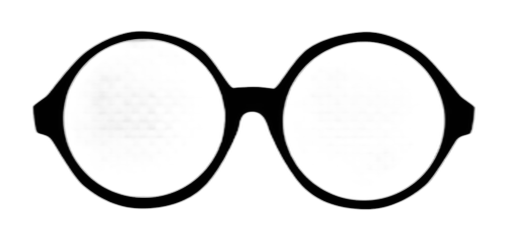

(920, 390)


In [23]:
glasses_path = "D:\\Download_In_D\\3D_Python\\Scene1\\Source\\Glasses.png"

#Import Background image needed in scene 1
glasses = Image.open(glasses_path)

# glasses.putalpha(50)
glasses_RemovedBG = remove(glasses)
glasses_RemovedBG.filter(ImageFilter.SHARPEN())
glasses_RemovedBG.save("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\GlassesRemovedBG.png")
glasses_RemovedBG.show()
plt.axis('off')
plt.imshow(glasses_RemovedBG)
plt.show()
print(glasses_RemovedBG.size)

Remove HandHand background and make it Png

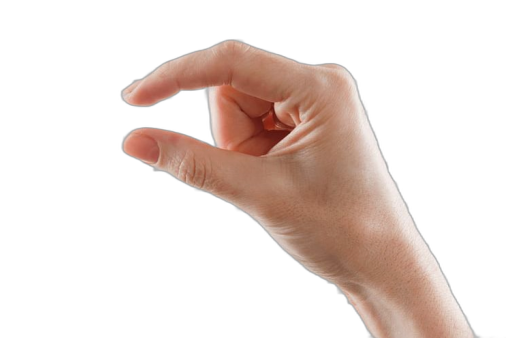

(728, 482)


In [24]:

Hand_path = "D:\\Download_In_D\\3D_Python\\Scene1\\Source\\Hand.jpg"

#Import Background image needed in scene 1
Hand = Image.open(Hand_path)

# glasses.putalpha(50)
Hand_RemovedBG = remove(Hand)
Hand_RemovedBG.filter(ImageFilter.SHARPEN())
Hand_RemovedBG.save("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\HandRemovedBG.png")
Hand_RemovedBG.show()
plt.axis('off')
plt.imshow(Hand_RemovedBG)
plt.show()
print(Hand_RemovedBG.size)

_ADD MEDIANFILTER increasingly (Dizzy effects)_
- _Update, add glasses_

Step_Per_Frame:  (18, -25)
Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_0.jpg


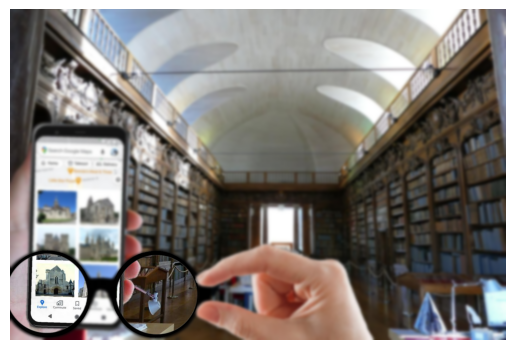

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_1.jpg


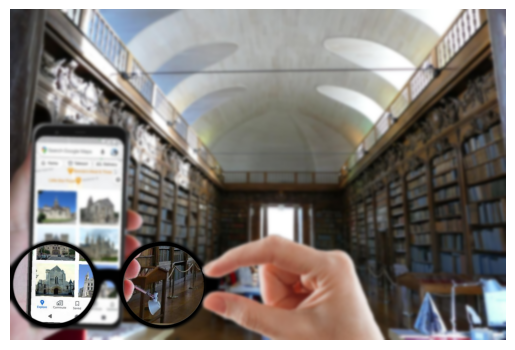

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_2.jpg


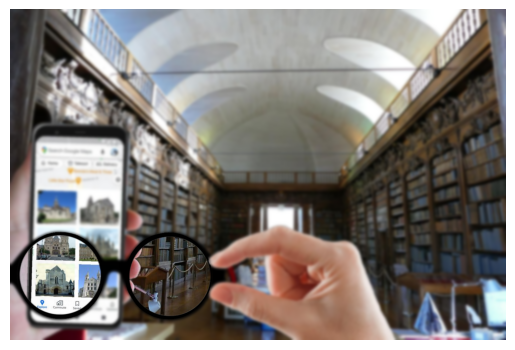

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_3.jpg


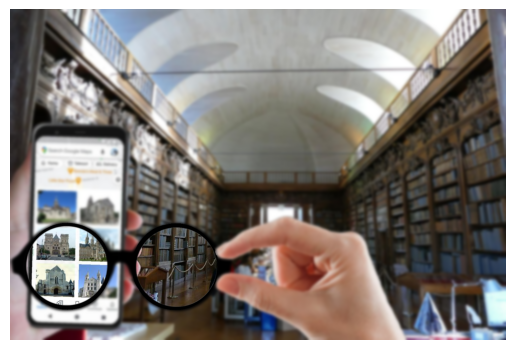

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_4.jpg


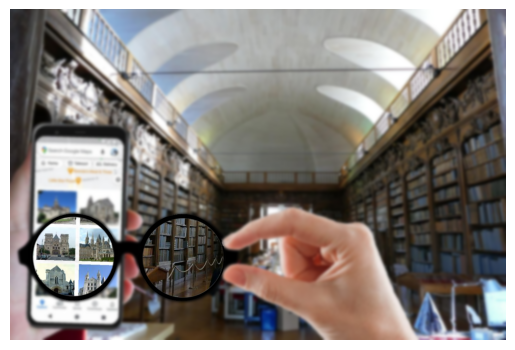

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_5.jpg


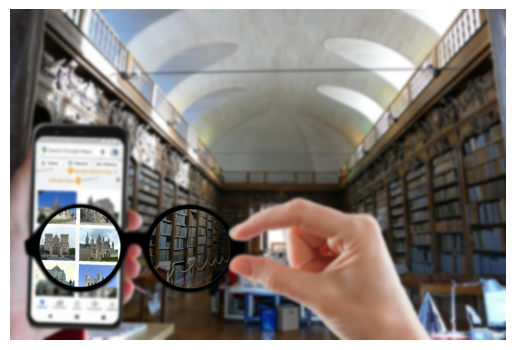

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_6.jpg


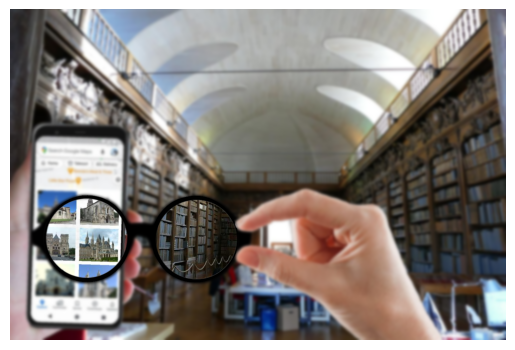

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_7.jpg


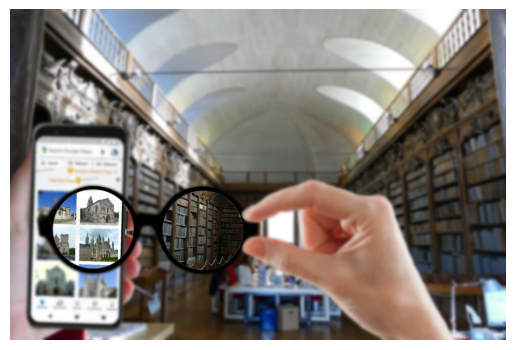

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_8.jpg


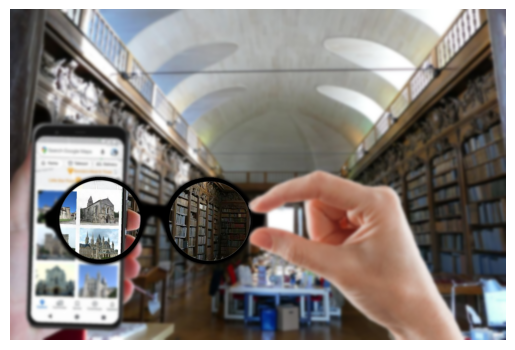

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_9.jpg


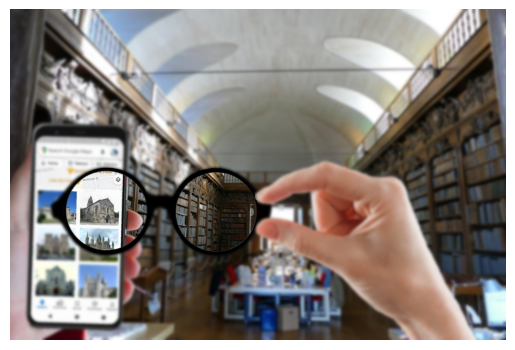

Loading kernel--1
Size of img:  (1350, 900)
D:\Download_In_D\3D_Python\Scene1\Outcome\Blurs\S1_2\Scene1_2_10.jpg


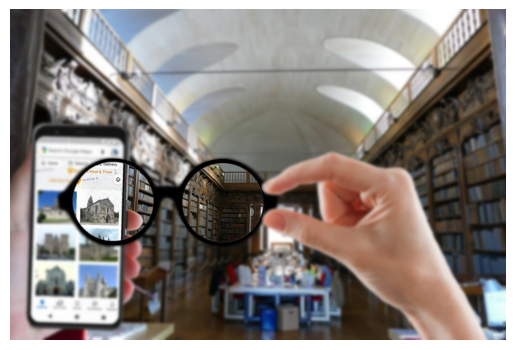

In [25]:
# glasses_RemovedBG_LOCATION = (100,200) #Frame is 1350,900 , But need (-100 ~ 900, 370 ~ 700) to be visualize
Scale_Everything = 1
# Rotation_Degree_Everything = 10
# k_size = [1,3,5,7,9,0,7,3,5,3,1,1,-1,-1,-1] #Number and level of Blury image to create
k_size = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
glasses_RemovedBG_Start_LOCATION = (-100, 650)
glasses_RemovedBG_End_LOCATION= (100,370)

Step_Per_Frame = np.subtract(glasses_RemovedBG_End_LOCATION,glasses_RemovedBG_Start_LOCATION) / len(k_size)
Step_Per_Frame = tuple(np.int8(Step_Per_Frame))
print("Step_Per_Frame: ", Step_Per_Frame)

scene1_main_image_dir = "D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Scene1_Thumbnailed_Phone_Map.jpg"

img_scene1 = Image.open(scene1_main_image_dir)

glasses_RemovedBG = Image.open("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\GlassesRemovedBG.png")
# glasses_RemovedBG = glasses_RemovedBG.rotate(-1.55,expand=4)
glasses_RemovedBG.thumbnail((img_scene1.width/2,img_scene1.height/2))
glasses_RemovedBG = glasses_RemovedBG.resize((int(glasses_RemovedBG.width*Scale_Everything),int((glasses_RemovedBG.height*Scale_Everything))))
# glasses_RemovedBG = glasses_RemovedBG.rotate(Rotation_Degree_Everything,expand=1)

Hand_RemovedBG = Image.open("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\HandRemovedBG.png")
Hand_RemovedBG = Hand_RemovedBG.resize((int((Hand_RemovedBG.width*1.2)*Scale_Everything),int(((Hand_RemovedBG.height*1.2)*Scale_Everything))))
Hand_RemovedBG = Hand_RemovedBG.filter(ImageFilter.SHARPEN)
# Hand_RemovedBG = Hand_RemovedBG.rotate(-Rotation_Degree_Everything,expand=1)

ctr=0
for i in k_size:
    
    ##### Try to add loop effect for hand and glass to move around the figure
    glasses_RemovedBG_Start_LOCATION = np.add(np.array(glasses_RemovedBG_Start_LOCATION),np.array(Step_Per_Frame))    
    glasses_RemovedBG_Start_LOCATION = tuple(glasses_RemovedBG_Start_LOCATION)
    #####
    
    image_dest_path = "D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Blurs\\S1_2\\Scene1_2_"+str(ctr)+".jpg" # Where you want to save the result

    
    if i==0:
        black_scene = np.zeros((900,1350,3), dtype=np.uint8) #same size, black screen
        cv2.imwrite(image_dest_path,black_scene)
    
    else:
        img_scene1 = Image.open(scene1_main_image_dir)

        print("Loading kernel-" + str(i))
        Image.Image.paste(img_scene1,glasses_RemovedBG, glasses_RemovedBG_Start_LOCATION,mask=glasses_RemovedBG)
        Hand_RemovedBG_LOCATION = np.add(np.array(glasses_RemovedBG_Start_LOCATION),np.array((390,-41)))  #Group Glasses and Hand together (Adjust location according to glasses location)
        Image.Image.paste(img_scene1,Hand_RemovedBG, tuple(Hand_RemovedBG_LOCATION),mask=Hand_RemovedBG)

        if i != -1:
            img_scene1 = img_scene1.filter(ImageFilter.MedianFilter(i)) ####


        #######################
        #Want to add circle for clear vision 

        print("Size of img: ", img_scene1.size)

        img_scene1 = np.array(img_scene1)
        img_scene1 = img_scene1[:, :, ::-1] #revrese for CV2
        # img_scene1 = cv2.cvtColor(img_scene1,cv2.COLOR_BGR2RGB)

        blurred_img = cv2.GaussianBlur(img_scene1, (21, 21), 0)

        mask = np.zeros((900,1350,3), dtype=np.uint8)

        Left_Clear_Sight_LOCATION = np.add(np.array(glasses_RemovedBG_Start_LOCATION),np.array((184,149)))  #Group Glasses and Hand together (Adjust location according to glasses location)
        Right_Clear_Sight_LOCATION = np.add(np.array(glasses_RemovedBG_Start_LOCATION),np.array((477,150)))  #Group Glasses and Hand together (Adjust location according to glasses location)

        Radius = 118 * Scale_Everything
        Leftmask = cv2.circle(mask, tuple(Left_Clear_Sight_LOCATION), int(Radius), (255, 255, 255), -1)
        Rightmask = cv2.circle(Leftmask, tuple(Right_Clear_Sight_LOCATION), int(Radius), (255, 255, 255), -1)
        img_scene1 = np.where(Rightmask==(255, 255, 255), img_scene1, blurred_img)
        cv2.imwrite(image_dest_path,img_scene1)

        img_scene1 = img_scene1[:, :, ::-1] #reverse back for Pil
        ###########################
    ctr +=1

    
    # cv2.imshow(" ",img_scene1)
    # cv2.waitKey(0)
    print(image_dest_path)
    plt.axis('off')
    plt.imshow(img_scene1)
    plt.show()

MAKE IT TO VIDEO / GIF

In [26]:
folder = ("D:\\Download_In_D\\3D_Python\\Scene1\\Outcome\\Blurs\\S1_2")
images = []

create_video_from_images(folder) #Created Video and GIF

_Make a gif or video based on the previous Blur images_

Gif is shown below

![SegmentLocal](Outcome\Blurs\S1_2\Blur_WokeUp.gif "segment")
